
# <center>TRABAJO PRACTICO 1</center>
#### <center>Organizacion de Datos </center>

## <center>GRUPO 3</center>
### <center> Integrantes: Miguel Vazquez - Facundo Monpelat - Ramiro Gestoso - Gaston Avila - Paula Bruck</center>

- Para este Trabajo Practico tendremos que aplicar técnicas de análisis exploratorio, preprocesamiento de datos, agrupamiento, clasificación y regresión utilizando el conjunto de datos provisto por la empresa Properati correspondiente a anuncios de propiedades en venta de la República Argentina publicados durante el año 2021
- El mismo se encuentra dividio en 5 secciones:

    #### 1. Análisis Exploratorio y Preprocesamiento de Datos
        a) Exploración Inicial.
        b) Datos Faltantes
        c) Valores atípicos
        d) Reducción de la dimensionalidad
    #### 2. Agrupamiento
    #### 3. Clasificación
        a) Construcción del target
        b) Entrenamiento y Predicción
        Modelo 1 : Árbol de decisión
        Modelo 2: Random Forest
        Modelo 3: a elección
    #### 4. Regresión
        Modelo 1: KNN
        Modelo 2: XGBoost
        Modelo 3: a elección
    #### 5. Conclusiones

In [1]:
!ls

properati_argentina_2021.csv


Importamos las bibliotecas a utilizar a lo largo de nuestro trabajo 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Cargamos el dataset de properati

In [3]:
ds = pd.read_csv('properati_argentina_2021.csv')

## 1. Análisis exploratorio y preprocesamiento de datos

### a) Exploración inicial

Se realiza un primer vistazo general del dataset

En principio se observa la cantidad de observaciones y features contenidas:

In [4]:
shape = ds.shape
print("Filas: %d Columnas: %d" % (shape[0], shape[1]))

Filas: 460154 Columnas: 20


In [5]:
ds.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Obtenemos informacion relevante del dataset y sus columnas

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Clasificando las variables presentes en este dataset las dividiremos en :
- Cualitativas(categoricas):
    - Ordinales 
    - Nominales
- Cuantitativas(numericas):
    - Discretas (Sus modalidades son valores enteros. )
    - Continuas (Sus modalidades son valores reales. )

Las variables cuantitativas vemos del analisis que son:
- latitud (continua)
- longitud (continua)
- place_l6 (despues vemos que esta columna esta mal categorizada, tiene mal el dtype)
- property_rooms (ordinal)
- property_surface_total (continua)
- property_surface_covered (continua)
- property_price (continua)

In [7]:
variables_cuantitativas = [
    'latitud',
    'longitud',
    'property_rooms',
    'property_surface_total',
    'property_surface_covered',
    'property_price'
    ]
ds[variables_cuantitativas].describe()

,latitud,longitud,property_rooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,368498.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,3.278053,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,1.870832,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,1.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,2.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,3.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,4.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,40.000000,200000.000000,2.147484e+09,1.500000e+09


Las variables cualitativas:
- start_date (mal categorizada(la fecha esta puesta como string) sin embargo pertenece a cuantitativa)(ordinal)
- end_date (mal categorizada(la fecha esta puesta como string) sin embargo pertenece a cuantitativa)(ordinal)
- created_on (mal categorizada(la fecha esta puesta como string) sin embargo pertenece a cuantitativa)(ordinal)
- operation (nominal)
- place_l2 (nominal)
- place_l3 (nominal)
- place_l4 (nominal)
- place_l5 (nominal)
- property_type (nominal)
- property_currency (nominal)
- property_title (nominal)


### Filtramos las filas por aquellas que se ajusten a lo pedido en el enunciado

* property_type: Casa, PH o Departamento
* property_currency: USD
* operation: Venta
* place_l2 (provincia): Capital Federal

In [8]:
print('Property types')
print(ds['property_type'].value_counts().index.tolist())
print('Property currencies')
print(ds['property_currency'].value_counts().index.tolist())
print('Operations')
print(ds['operation'].value_counts().index.tolist())
print('Provincies')
print(ds['place_l2'].value_counts().index.tolist())

Property types
['Departamento', 'Casa', 'Lote', 'PH', 'Local comercial', 'Oficina', 'Otro', 'Cochera', 'Depósito', 'Casa de campo']
Property currencies
['USD', 'ARS', 'UYU', 'PEN', 'COP']
Operations
['Venta', 'Alquiler', 'Alquiler temporal']
Provincies
['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste', 'Córdoba', 'Buenos Aires Costa Atlántica', 'Neuquén', 'Montevideo', 'Buenos Aires Interior', 'Maldonado', 'Mendoza', 'Río Negro', 'Tucumán', 'Colonia', 'Salta', 'Entre Ríos', 'San Juan', 'La Pampa', 'Canelones', 'Chubut', 'San Luis', 'Misiones', 'Florida', 'Jujuy', 'Corrientes', 'Michigan', 'Chaco', 'Rocha', 'Tierra Del Fuego', 'Santiago Del Estero', 'Santa Catarina', 'Santa Cruz', 'Rio Grande do Norte', 'Maryland', 'Catamarca', 'La Rioja', 'Miami', 'Pennsylvania', 'Rio de Janeiro', 'Formosa', 'São Paulo', 'California']


Analizando los valores que toman las variables que utilizaremos, podemos afirmar que no se excluyen valores que deban entrar en la categoría pensada.

Entonces procedemos a filtrar el dataset

In [9]:
property_type_cond = ds['property_type'].isin(['Casa', 'PH','Departamento'])
property_currency_cond = ds['property_currency']  == 'USD'
operation_cond = ds['operation'] == 'Venta'
location_cond = ds['place_l2'] == 'Capital Federal' # segun documentacion "place_l2" es la provincia

ds_properati = ds[property_type_cond & property_currency_cond & operation_cond & location_cond]
ds_properati.reset_index(drop=True, inplace=True)
ds_properati.shape

(94249, 20)

In [51]:
ds_properati.head()

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Analizamos si existen filas duplicadas

In [10]:
print(f'Cantidad de filas duplicadas: {ds_properati.duplicated().sum()}')

Cantidad de filas duplicadas: 0


Convertimos las fechas a tipo date para su utilización

In [11]:
ds_properati['start_date'] = pd.to_datetime(ds_properati['start_date'], errors='coerce')
ds_properati['end_date'] = pd.to_datetime(ds_properati['end_date'], errors='coerce')
ds_properati['created_on'] = pd.to_datetime(ds_properati['created_on'], errors='coerce')

/tmp/ipykernel_81/797357110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_properati['start_date'] = pd.to_datetime(ds_properati['start_date'], errors='coerce')
/tmp/ipykernel_81/797357110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_properati['end_date'] = pd.to_datetime(ds_properati['end_date'], errors='coerce')
/tmp/ipykernel_81/797357110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Verificamos que la conversion se haya realizado correctamente

In [12]:
ds_properati.dtypes.loc[['start_date', 'end_date', 'created_on']]

start_date    datetime64[ns]
end_date      datetime64[ns]
created_on    datetime64[ns]
dtype: object

### Variables irrelevantes

Considerando que la única utilidad que tiene la columna ID, para nuestro caso de estudio, es para el uso del archivo de descripciones, la consideramos irrelevante. A su vez tambien podemos agregar, dentro de esta categoria, a "place_l5" y "place_l6" que tienen todos, o casi todos sus datos incompletos.

In [13]:
ds_properati.drop(['id', 'place_l5', 'place_l6'], axis=1, inplace = True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Gráficos de variables

Graficamos algunas variables cualitativas que creemos que se pueden interpretar bien mediante graficos

(array([0, 1, 2]),
 [Text(0, 0, 'Departamento'), Text(1, 0, 'PH'), Text(2, 0, 'Casa')])

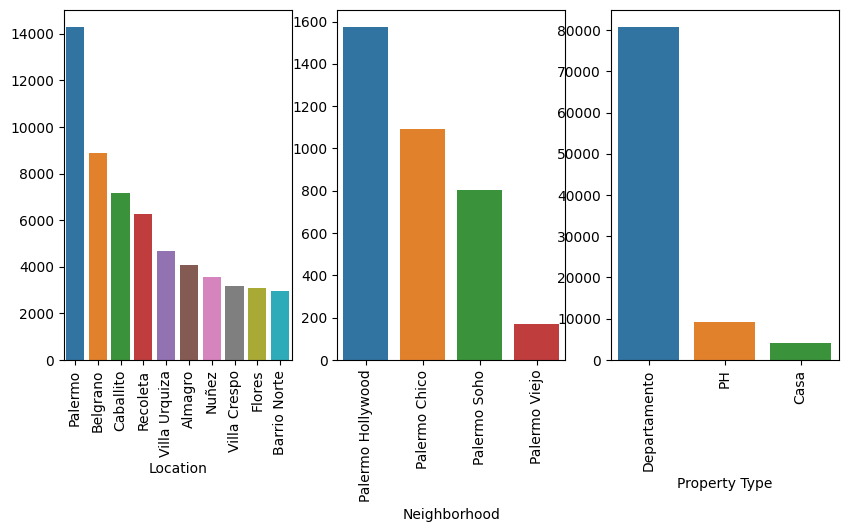

In [14]:
#Grafico boxplots 

plt.figure(figsize=(10,10))
      
plt.subplot(231)
localidad = ds_properati['place_l3'].value_counts().head(10)
sns.barplot(x=localidad.index, y=localidad.values)
plt.xlabel('Location')
plt.xticks(rotation=90)
  
plt.subplot(232)
zonas = ds_properati['place_l4'].value_counts().head(10)
sns.barplot(x=zonas.index, y=zonas.values)
plt.xlabel('Neighborhood')
plt.xticks(rotation=90)
  
plt.subplot(233)
types = ds_properati['property_type'].value_counts()
sns.barplot(x=types.index, y=types.values)
plt.xlabel('Property Type')
plt.xticks(rotation=90)
  

Graficamos las variables cuantitavias

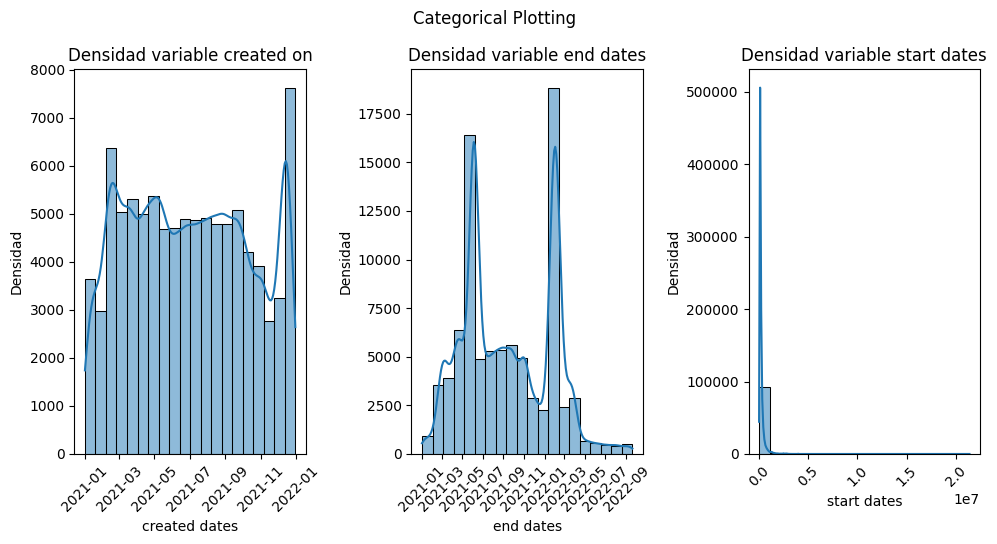

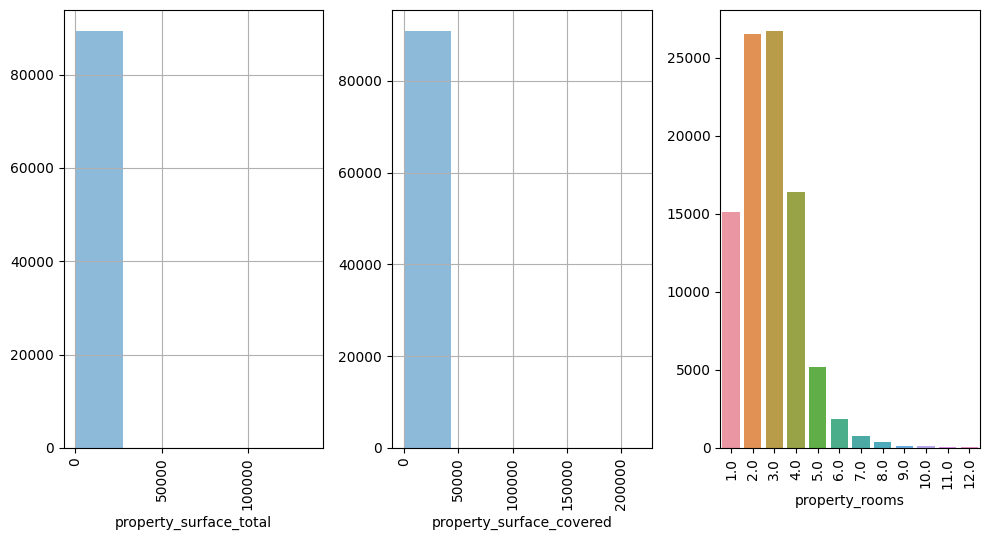

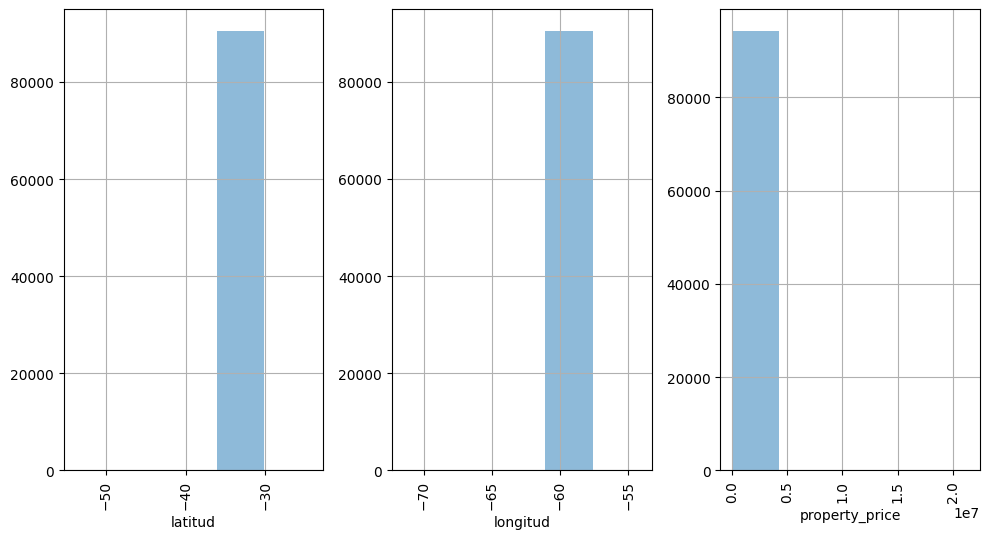

In [15]:
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)
fig.suptitle('Categorical Plotting')
sns_hist=sns.histplot(bins=20, data=ds_properati['property_price'], kde=True, alpha = 0.5).set(title="Densidad variable start dates",xlabel="start dates",ylabel="Densidad")
plt.sca(ax[0])
plt.xticks(rotation=45)

sns_hist=sns.histplot(bins=20, data=ds_properati['created_on'], kde=True, alpha = 0.5).set(title="Densidad variable created on",xlabel="created dates",ylabel="Densidad")
plt.sca(ax[1])
plt.xticks(rotation=45)

sns_hist=sns.histplot(bins=20, data=ds_properati['end_date'], kde=True, alpha = 0.5).set(title="Densidad variable end dates",xlabel="end dates",ylabel="Densidad")
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

fig, ax = plt.subplots(1,3)

rooms=ds_properati['property_rooms'].value_counts().head(12)
sns.barplot(x=rooms.index, y=rooms.values)
plt.xlabel('property_rooms')
plt.sca(ax[0])
plt.xticks(rotation=90)

grf=ds_properati['property_surface_total'].hist(alpha=0.5,bins=5)
plt.xlabel('property_surface_total')
plt.sca(ax[1])
plt.xticks(rotation=90)


grf=ds_properati['property_surface_covered'].hist(alpha=0.5,bins=5)
plt.xlabel('property_surface_covered')
plt.sca(ax[2])
plt.xticks(rotation=90)

fig.show()
fig, ax = plt.subplots(1,3)
grf=ds_properati['property_price'].hist(alpha=0.5,bins=5)
plt.xlabel('property_price')
plt.sca(ax[0])
plt.xticks(rotation=90)

grf=ds_properati['latitud'].hist(alpha=0.5,bins=5)
plt.xlabel('latitud')
plt.sca(ax[1])
plt.xticks(rotation=90)

grf=ds_properati['longitud'].hist(alpha=0.5,bins=5)
plt.xlabel('longitud')
plt.sca(ax[2])
plt.xticks(rotation=90)

fig.show()


## Analisis de correlacion de variables

<AxesSubplot:>

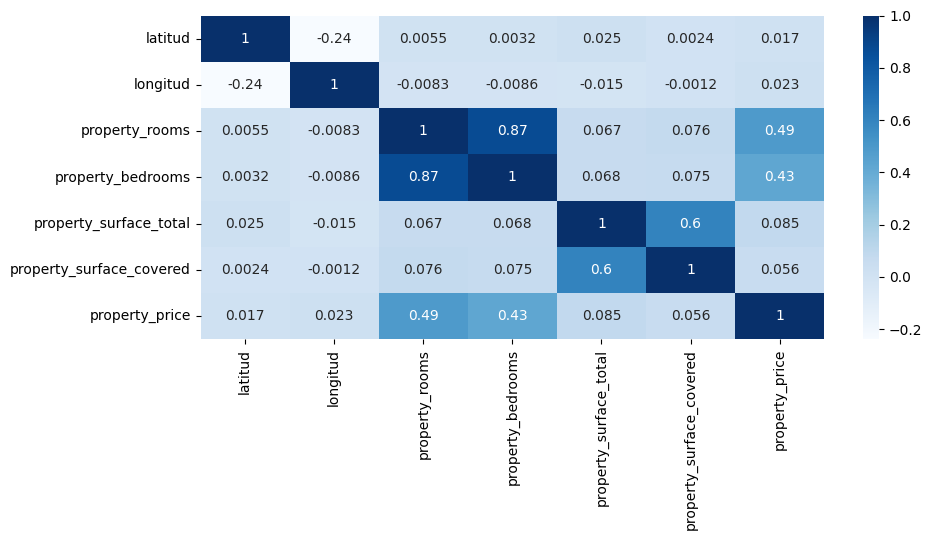

In [16]:
sns.heatmap(data=ds_properati.corr(), annot=True, cmap='Blues')

### Pares de variables con correlacion considerable:

* property_rooms & property_bedrooms -> correlacion positiva

* property_surface_covered & property_surface_total -> correlacion positiva

* property_rooms & property_price -> correlacion positiva

* property_bedrooms & property_price -> correlacion positiva

En todos tiene sentido que exista una correlacion. La cantidad de 'bedrooms' siempre va a estar limitada superiormente por la cantidad de 'rooms'. Algo parecido sucede con la superficie cubierta sobre la superficie total. Nunca se prodrá cubrir mas que el total. Tambien asi, los precios de las propiedades van a estar determinados, en parte, por la cantidad de ambientes (teniendo en cuenta habitaciones).

Estas condiciones explican la razon de la correlación y por qué tienen sentido.

Sin embargo, mirando los graficos de dispersion, podemos observar que algunas de estas "reglas" no se cumplen, lo que conduce a posibles valores atipicos, ya que no tienen sentido (aquellos puntos que estén por encima de la recta verde). Por ejemplo, en el segundo grafico podemos ver que hay casos de superficie cubierta mayor a la superficie total, lo cual no tiene sentido. Algo parecido pasa con el primer grafico.

Todos estos aspectos se analizarán en la sección de valores atipicos.

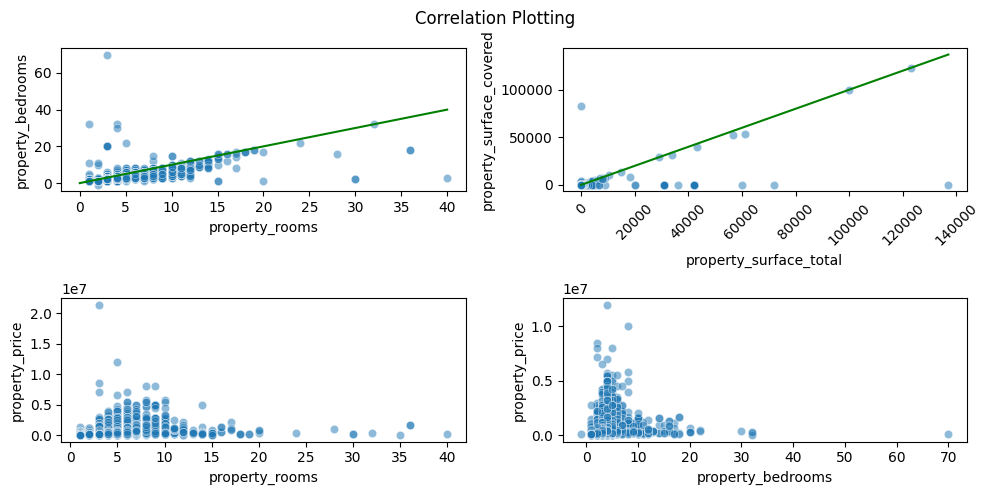

In [17]:
correlacion1 = ds_properati[['property_rooms', 'property_bedrooms']]
max_rooms = correlacion1['property_rooms'].max()

correlacion2 = ds_properati[['property_surface_covered', 'property_surface_total']]
max_surface_total = correlacion2['property_surface_total'].max()

correlacion3 = ds_properati[['property_rooms','property_price']]
correlacion4 = ds_properati[['property_bedrooms','property_price']]

fig, ax = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Correlation Plotting')

sns.scatterplot(x='property_rooms', y='property_bedrooms',data=correlacion1, alpha=0.5, ax = ax[0][0])
sns.lineplot(x=[0,max_rooms], y=[0,max_rooms], c='Green', ax = ax[0][0])

sns.scatterplot(x='property_surface_total', y='property_surface_covered',data=correlacion2, alpha=0.5, ax = ax[0][1])
sns.lineplot(x=[0,max_surface_total], y=[0,max_surface_total], c='Green', ax = ax[0][1])
ax[0][1].tick_params(axis='x', rotation=45)

sns.scatterplot(x='property_rooms', y='property_price',data=correlacion3, alpha=0.5, ax = ax[1][0])

sns.scatterplot(x='property_bedrooms', y='property_price',data=correlacion4, alpha=0.5, ax = ax[1][1])

fig.tight_layout()


### b) Datos faltantes

Calculamos el porcentaje de datos nulos por columna.

In [18]:
nullable_percentages = (ds_properati.isnull().sum() / ds_properati.shape[0]) * 100
print(nullable_percentages)

start_date                   0.000000
end_date                     5.348598
created_on                   0.000000
latitud                      3.957602
longitud                     3.957602
place_l2                     0.000000
place_l3                     0.442445
place_l4                    96.134707
operation                    0.000000
property_type                0.000000
property_rooms               1.107704
property_bedrooms           11.657418
property_surface_total       5.139577
property_surface_covered     3.558658
property_price               0.000000
property_currency            0.000000
property_title               0.000000
dtype: float64


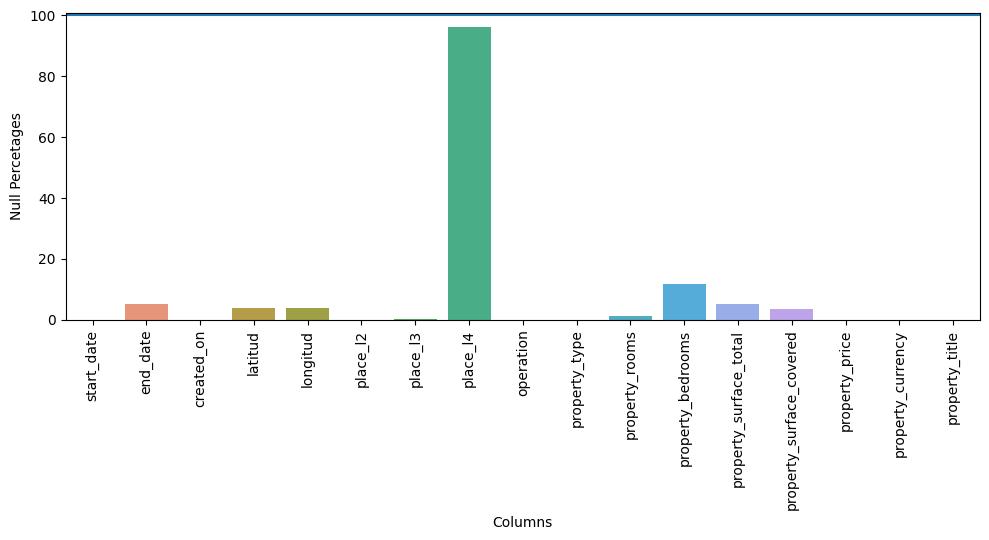

In [19]:
nullable_percentages = (ds_properati.isnull().sum() / ds_properati.shape[0]) * 100

graph = sns.barplot(x=nullable_percentages.index, y=nullable_percentages.values)
graph.axhline(100)
plt.xticks(rotation=90)
plt.ylabel("Null Percetages")
plt.xlabel("Columns")
plt.tight_layout()

- Podemos observar que la columna place_l4 tiene un porcentaje de nulos de 96.134707% siendo de todas las columnas la que mayor cantidad de nulos posee. Por esto consideramos que no es relevante para nuestro analisis y procederemos a eliminarla.

In [52]:
ds_properati.drop(['place_l4'], axis=1, inplace = True)

Comprobamos que se haya eliminado correctamente

In [53]:
ds_properati.head()

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Calculamos el porcentaje de datos nulos por fila.

In [54]:
ds=ds_properati.isna().copy()

- Aqui podemos observar cuantos valores nulos tiene cada fila.(True== Nan)

In [55]:
ds.head(10)

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
print("La cantidad de filas que contiene valores nulos son :",ds_properati.isnull().any(axis=1).sum())
nullrowspercentage= (ds_properati.isnull().any(axis=1).sum() / ds_properati.shape[0]) * 100
print("El porcentaje de filas nulas que tiene el dataset es de ",nullrowspercentage,"%")
nullquantityperrow=(ds_properati.isnull().sum(axis=1)).sort_values(ascending=False).value_counts()
print("\n La cantidad de registros que tienen una misma cantidad de nulos \n",nullquantityperrow)
nullperrow= ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100
print("\n El porcentaje de nulos por cada fila es \n",nullperrow)
nullsortedpercentages= (ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100).sort_values(ascending=False).value_counts()
print("\n La cantidad de filas que se tienen un mismo porcentaje \n",nullsortedpercentages)

La cantidad de filas que contiene valores nulos son : 24699
El porcentaje de filas nulas que tiene el dataset es de  26.206113592717163 %

 La cantidad de registros que tienen una misma cantidad de nulos 
 0    69550
1    18101
2     5145
3     1171
4      170
5      110
6        1
7        1
dtype: int64

 El porcentaje de nulos por cada fila es 
 0        18.75
1         0.00
2         0.00
3         6.25
4         6.25
         ...  
94244     0.00
94245     0.00
94246     0.00
94247     0.00
94248     0.00
Length: 94249, dtype: float64

 La cantidad de filas que se tienen un mismo porcentaje 
 0.00     69550
6.25     18101
12.50     5145
18.75     1171
25.00      170
31.25      110
43.75        1
37.50        1
dtype: int64


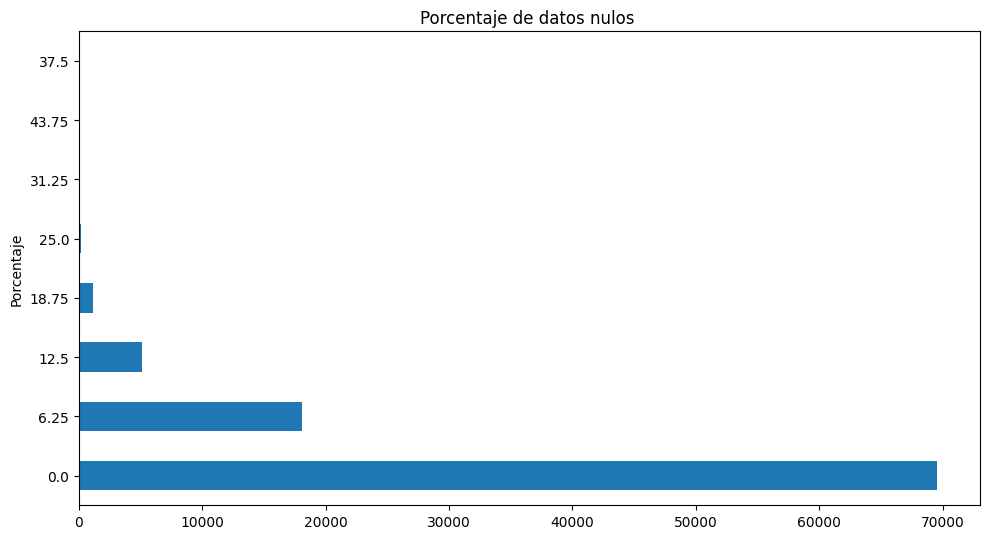

<Figure size 1500x1000 with 0 Axes>

In [57]:
nullsortedpercentages.plot(kind = "barh", title="Porcentaje de datos nulos ", ylabel="Cantidad de registros",xlabel="Porcentaje")
plt.figure(figsize=(15, 10))
plt.show()

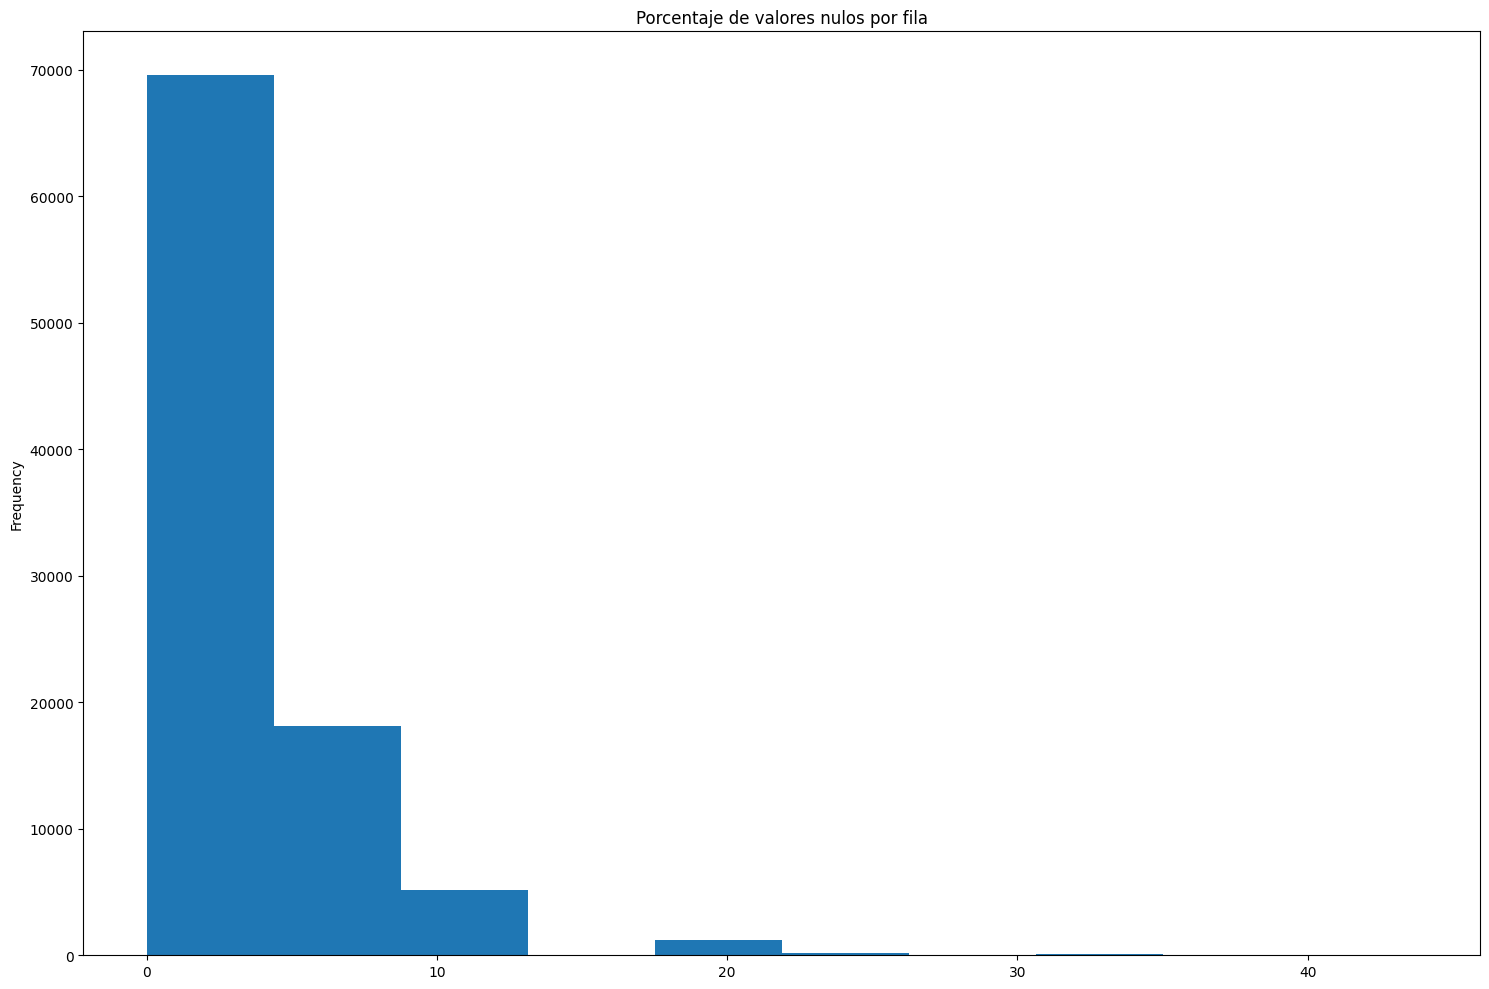

In [58]:
plt.figure(figsize=(15, 10))

nullperrow.sort_values(inplace=True)
nullperrow.plot.hist(bins=10, xlabel='Porcentaje de valores nulos', ylabel='Cantidad de filas', title='Porcentaje de valores nulos por fila')

plt.show()

- Podemos decir que  1 registro tiene 7 valores nulos , 1 registro 6 valores nulos , 110 registros 5 valores nulos , 170 resgistros 4 valores nulos , 1171 registros 3 valores nulos , 5145 registros 2 valores nulos y 18101 1 valor nulo y 69550 registros 0 valores nulos. 
- Hemos tomado como criterio que  aquellos registros que tiene igual o mas de ????? valores nulos seran eliminados ya que al ser tanta la informacion faltante no serian de gran utilidad para nuestro analisis.



Trabajar con datos Faltantes
Criterios:
- Yo diria que si a una fila le faltan mas de 5 datos eliminemos la fila
- Para property_room y property_bedroom podriamos usar imputacion de datos  mediante regresion ya que tomando la superficie total que ocupa la propiedad podemos predecir cuantas habitaciones o ambientes tendra.
- Para latitu y longitud podriamos usar la imputacion ....
- Para property_price y property_currency

### c) Valores atípicos

<AxesSubplot:xlabel='property_type', ylabel='property_rooms'>

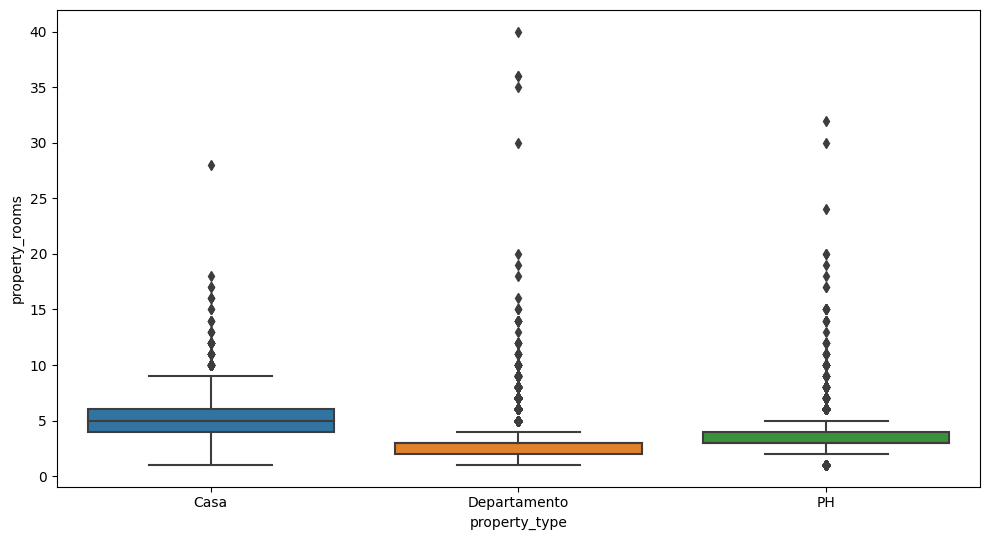

In [29]:
# muchos outliers con rooms > 10
# ds_properati[ds_properati['property_rooms']>10].shape[0]
sns.boxplot(x='property_type', y='property_rooms',data=ds_properati)
#sns.boxplot(x='property_type', y='property_rooms',data=ds_properati[ds_properati['property_rooms']<10])


<AxesSubplot:xlabel='property_type', ylabel='property_bedrooms'>

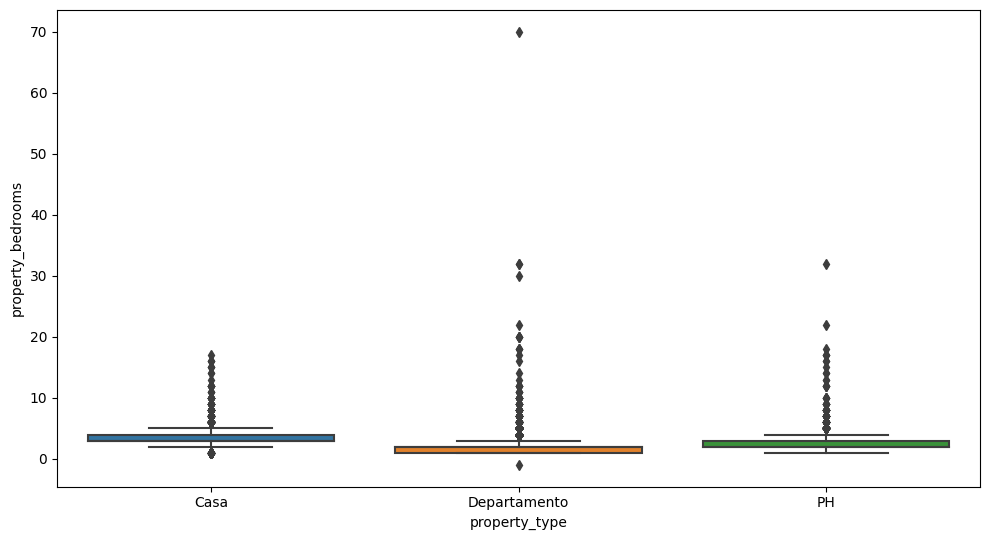

In [30]:
# muchos outliers con rooms > 10
sns.boxplot(x='property_type', y='property_bedrooms',data=ds_properati)
#sns.boxplot(x='property_type', y='property_bedrooms',data=ds_properati[ds_properati['property_bedrooms']<10])

<AxesSubplot:xlabel='property_type', ylabel='property_surface_total'>

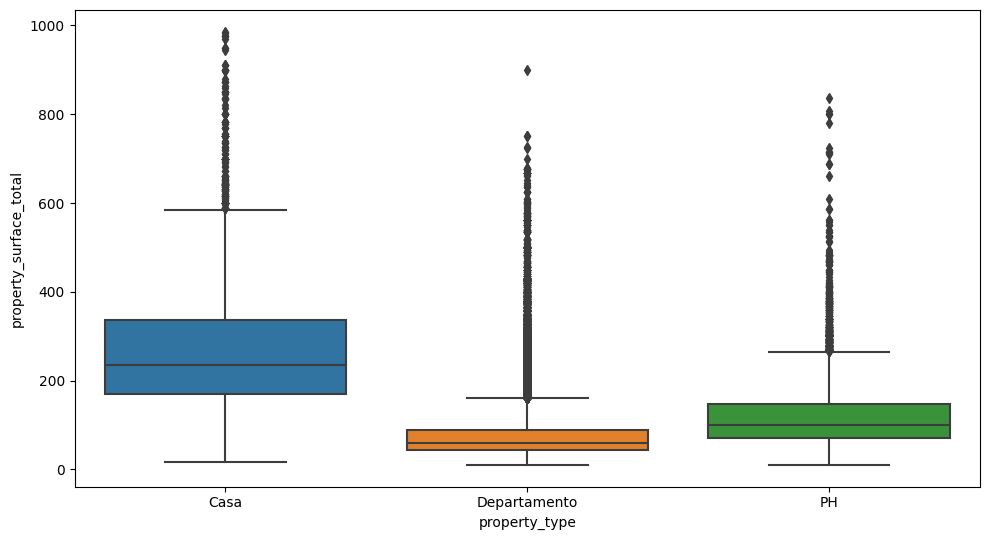

In [31]:
# muchos outliers con valores extremadamente altos
# lo normal maximo es 600 m^2 (aprox)
#sns.boxplot(x='property_type', y='property_surface_total',data=ds_properati)
sns.boxplot(x='property_type', y='property_surface_total',data=ds_properati[ds_properati['property_surface_total']<1000])

<AxesSubplot:xlabel='property_type', ylabel='property_surface_covered'>

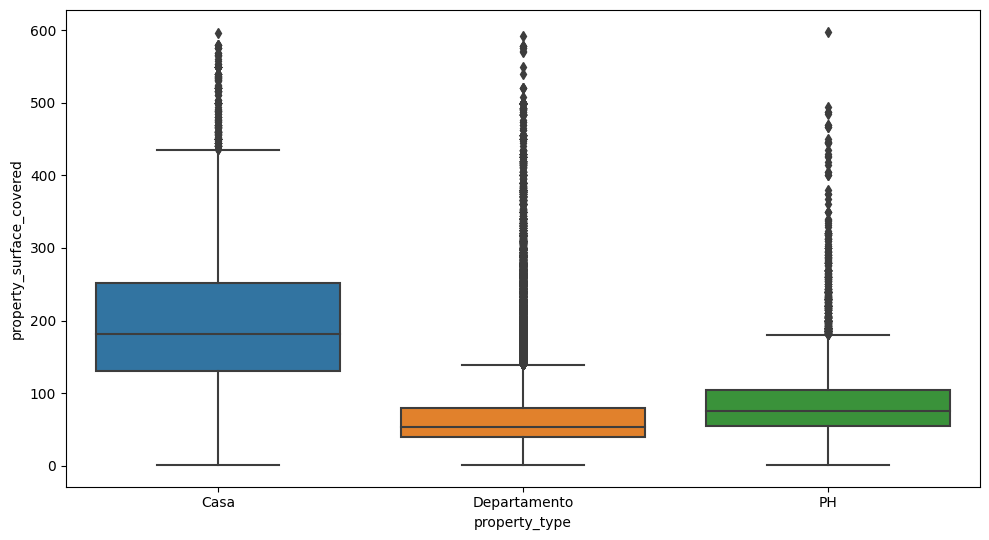

In [32]:
# muchos ouliers
# lo normal maximo es 450 m^2 (aprox)
#sns.boxplot(x='property_type', y='property_surface_covered', data=ds_properati)
sns.boxplot(x='property_type', y='property_surface_covered',data=ds_properati[ds_properati['property_surface_covered']<600])

<AxesSubplot:xlabel='property_type', ylabel='property_price'>

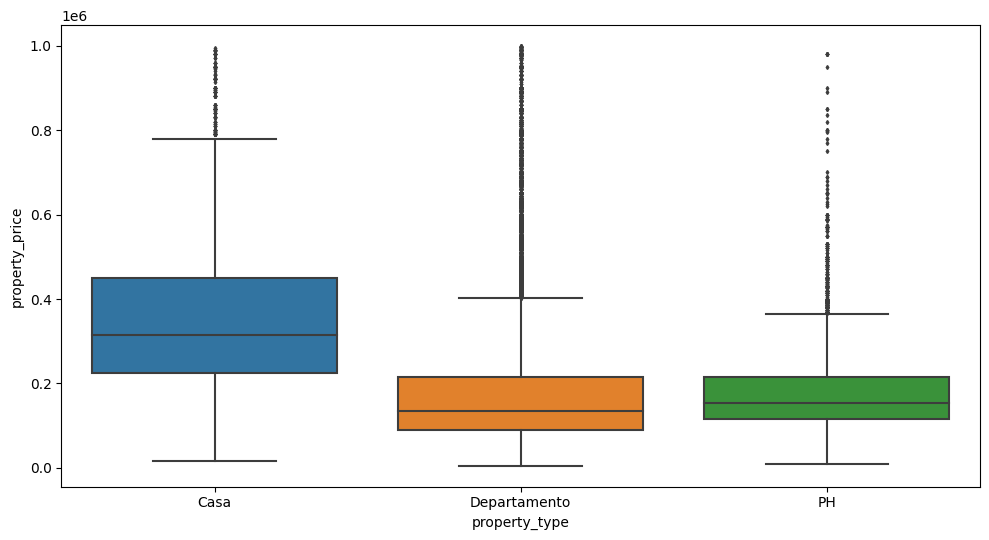

In [33]:
# muchos outliers
# lo normal maximo es 800 000 dolares (aprox)
#sns.boxplot(x='property_type', y='property_price', data=ds_properati)
sns.boxplot(x='property_type', y='property_price', data=ds_properati[ds_properati['property_price']<1000000], fliersize=2)

### d) Reducción de la dimensionalidad

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7da1cea6-caf2-4c30-b019-068f1fb82c77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>